In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

In [2]:
def gen_poiss_proc(lamb, T):
    S = [0]
    I = 0
    t = 0
    while True:
        U = np.random.uniform(0, 1)
        t = t - np.log(U) / lamb
        if t < T:
            I += 1
            S.append(t)
        else:
            return S

In [3]:
def N_t(poiss, T):
    p = np.asarray(poiss)
    n = np.zeros(len(T))
    for i in range(len(T)):
        n[i] = (p <= T[i]).sum()
    return n

In [4]:
P1 = gen_poiss_proc(2, 10)
P2 = gen_poiss_proc(5, 10)

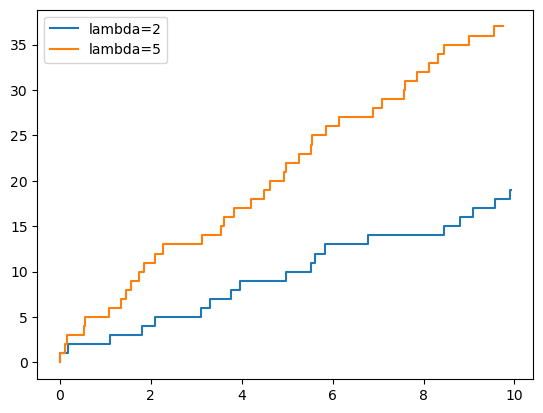

In [5]:
plt.step(P1, np.arange(0, len(P1), 1), label="lambda=2")
plt.step(P2, np.arange(0, len(P2), 1), label="lambda=5")
plt.legend()

In [6]:
n1 = np.zeros(100)
n2 = np.zeros(100)
for i in range(100):
    P1 = gen_poiss_proc(2, 10)
    P2 = gen_poiss_proc(5, 10)
    n1[i] = N_t(P1, [5])[0]
    n2[i] = N_t(P2, [5])[0]

/home/aga/miniconda3/envs/symulacje/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aga/miniconda3/envs/symulacje/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


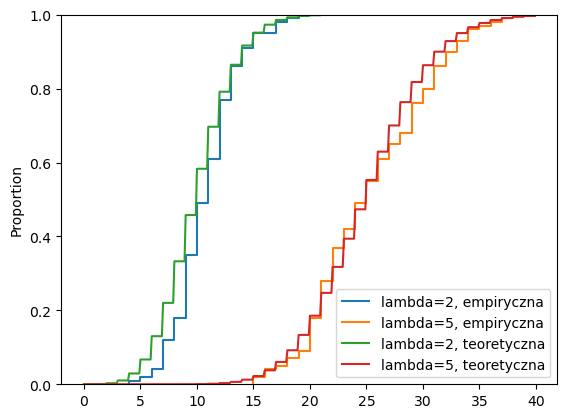

In [7]:
sns.ecdfplot(n1, label="lambda=2, empiryczna")
sns.ecdfplot(n2, label="lambda=5, empiryczna")
t = np.arange(0, 40, 0.1)
plt.plot(t, poisson.cdf(t, 10), label="lambda=2, teoretyczna")
plt.plot(t, poisson.cdf(t, 25), label="lambda=5, teoretyczna")
plt.legend()